In [1]:
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.neighbors import KNeighborsRegressor
import mglearn #library provided by amueller
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split



*The NASA data set comprises different size NACA 0012 airfoils at various wind tunnel speeds and angles of attack. The span of the airfoil and the observer position were the same in all of the experiments.*


**Attribute Information:**

This problem has the following inputs:
1. Frequency, in Hertzs.
2. Angle of attack, in degrees.
3. Chord length, in meters.
4. Free-stream velocity, in meters per second.
5. Suction side displacement thickness, in meters.

The only output is:
6. Scaled sound pressure level, in decibels.

In [2]:
data = pd.read_csv('airfoil_self_noise.dat', delimiter='\t', names=['freq', 'angle', 'chord_len', 'FS_velocity', 'SSD_thickness', 'SPL'])
data

,freq,angle,chord_len,FS_velocity,SSD_thickness,SPL
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


In [3]:
data.isna().sum()

freq             0
angle            0
chord_len        0
FS_velocity      0
SSD_thickness    0
SPL              0
dtype: int64

In [4]:
X = data.drop('SPL', axis=1)
display(X)
X = normalize(X, norm='l2', axis=0)
y = data.iloc[:, -1]
y

,freq,angle,chord_len,FS_velocity,SSD_thickness
0,800,0.0,0.3048,71.3,0.002663
1,1000,0.0,0.3048,71.3,0.002663
2,1250,0.0,0.3048,71.3,0.002663
3,1600,0.0,0.3048,71.3,0.002663
4,2000,0.0,0.3048,71.3,0.002663
...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849
1499,3150,15.6,0.1016,39.6,0.052849
1500,4000,15.6,0.1016,39.6,0.052849
1501,5000,15.6,0.1016,39.6,0.052849


0       126.201
1       125.201
2       125.951
3       127.591
4       127.461
         ...   
1498    110.264
1499    109.254
1500    106.604
1501    106.224
1502    104.204
Name: SPL, Length: 1503, dtype: float64

In [5]:
all_training = pd.DataFrame()
all_test = pd.DataFrame()
for seedN in range(1,30,1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seedN)
    training_accuracy = []  
    test_accuracy = []
    neighbors_settings = range(1, 40) # try n_neighbors from 1 to 10

    for n_neighbors in neighbors_settings:   
        reg = KNeighborsRegressor(n_neighbors=n_neighbors) # build the model 
        reg.fit(X_train, y_train) #clf = KNeighborsClassifier(n_neighbors=n_neighbors    
        training_accuracy.append(reg.score(X_train, y_train)) # record training set accuracy  
        test_accuracy.append(reg.score(X_test, y_test)) # record generalization accuracy    
    all_training[seedN]=training_accuracy
    all_test[seedN] = test_accuracy

In [18]:
optimal_k = all_test.mean(axis=1).idxmax() + 1
test_optimal = all_test.mean(axis=1)[optimal_k]

print(f'optimal neighbor k = {optimal_k}\ntest score = {test_optimal}')

optimal neighbor k = 2
test score = 0.8459969686232958


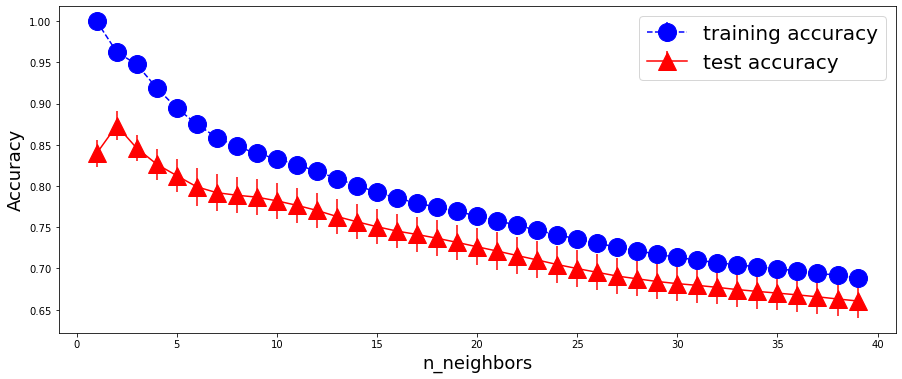

In [7]:
fig = plt.figure(figsize=(15, 6))
import pylab as plot
params = {'legend.fontsize': 20, 'legend.handlelength': 2}
plot.rcParams.update(params)

plt.errorbar(neighbors_settings, all_training.mean(axis=1),
             yerr=all_training.std(axis=1), label="training accuracy", color='blue', marker='o', linestyle='dashed', markersize=18)
plt.errorbar(neighbors_settings, all_test.mean(axis=1),
             yerr=all_test.std(axis=1), label="test accuracy", color='red', marker='^', linestyle='-', markersize=18)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("n_neighbors",fontsize=18)
plt.legend()

0.8752666691820404

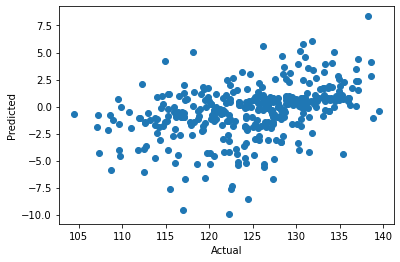

In [22]:
from sklearn.metrics import r2_score




reg = KNeighborsRegressor(n_neighbors=optimal_k)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)
reg.fit(X_train, y_train)

plt.plot(y_test, y_test - reg.predict(X_test), 'o')

plt.xlabel("Actual")
plt.ylabel("Predicted")

r2 = r2_score(y_test, reg.predict(X_test))
r2
